In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import scipy.stats as stats
#数据预处理：特征提取，归一化，划分数据集
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score      #交叉验证k-fold

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,learning_curve      #超参数搜索
from sklearn.metrics import classification_report,confusion_matrix

In [10]:
data = pd.read_excel(r"C:\Users\11389\Desktop\新建 Microsoft Excel 工作表.xlsx")

In [11]:
data['occ'].value_counts()

occ
Prof        112
Craft        84
BlueCol      69
WhiteCol     41
Menial       31
Name: count, dtype: int64

In [12]:
x = data.drop(['occ'],axis=1)
y = data['occ']

In [13]:
#分割训练集测试集
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=66)
# 标准化特征
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#### 训练

In [16]:
clf = LogisticRegression()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)  #0,1分类
y_pred_prob = clf.predict_proba(x_test)
print("train_score = ",clf.score(x_train,y_train))
print('test_score = ',clf.score(x_test,y_test))

train_score =  0.4944237918215613
test_score =  0.4264705882352941


#### 可视化评估

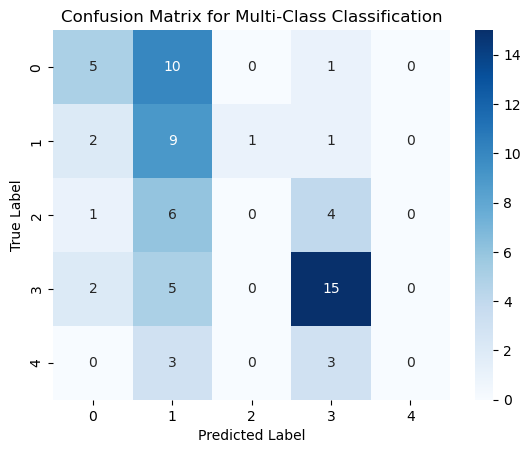

In [19]:
cm = confusion_matrix(y_test, y_pred)
# 可视化混淆矩阵
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Multi-Class Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [20]:
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### 导出

In [36]:
pred_df = pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_pred), pd.DataFrame(y_pred_prob)], axis=1)
pred_df.to_excel(r"C:\Users\11389\Desktop\pred_iris.xlsx")

## **回归**

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import scipy.stats as stats
#数据预处理：特征提取，归一化，划分数据集
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score      #交叉验证k-fold

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [20]:
data = pd.read_csv(r"C:\Users\11389\Desktop\archive (1)\house_price_regression_dataset.csv")

In [21]:
display(data)

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06
...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10,7.014940e+05
996,3179,1,2,1999,2.977123,1,10,6.837232e+05
997,2606,4,2,1962,4.055067,0,2,5.720240e+05
998,4723,5,2,1950,1.930921,0,7,9.648653e+05


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [34]:
x = data.drop(['House_Price'],axis=1)
y = data['House_Price']

In [35]:
#分割训练集测试集
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8, random_state=66)

In [38]:
reg = LinearRegression()
reg.fit(x_train,y_train)
#拟合、预测
y_pred = reg.predict(x_test)

In [40]:
#回归系数
print("n_features_in_ = ",reg.n_features_in_)                 #特征数量
print('reg.coef_ = '  , reg.coef_)                               #系数
print('reg.intercept_ = ' , reg.intercept_)

n_features_in_ =  7
reg.coef_ =  [  199.79035884 10361.25068417  8099.48259426   995.0183565
 14919.707727    5235.60752638    60.84144481]
reg.intercept_ =  -2014455.0888629742


In [66]:
print("train_score = %.6f" %reg.score(x_train,y_train))#回归的score一般默认为r2
print("test_score = %.6f" %reg.score(x_test,y_test))#回归的score一般默认为r2
print("mse = %.1f" %mean_squared_error(y_test,y_pred))#和统计上的MSE不同，没有自由度修正，这里是除以n
print("mae = %.1f" %mean_absolute_error(y_test,y_pred))
print("r2 = %.6f" %r2_score(y_test,y_pred))
print("adj-r2 = %.6f" %(1-mean_squared_error(y_test,y_pred)*(len(y)-1)/np.var(y_test)/(len(y)-reg.n_features_in_-1)))

train_score = 0.998590
test_score = 0.998226
mse = 116164104.1
mae = 8678.2
r2 = 0.998226
adj-r2 = 0.998213


#### 导出

In [72]:
pred_df = pd.concat([pd.DataFrame(y),pd.DataFrame(reg.predict(x))], axis=1)
pred_df.to_excel(r"C:\Users\11389\Desktop\yreg.xlsx")

In [1]:
import os
os.getcwd()

'C:\\Users\\11389\\文件夹\\教材编写'